In [1]:
import pandas as pd

In [11]:
customers=pd.read_csv("C:\\Users\\meghana\\Downloads\\Customers.csv")
transactions=pd.read_csv("C:\\Users\\meghana\\Downloads\\Transactions.csv")

In [15]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index().rename(columns={'TotalValue': 'TotalSpent', 'TransactionID': 'TransactionCount'})
customer_profile = pd.merge(customers, customer_transactions, on='CustomerID', how='left').fillna(0)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
features = ['TotalSpent', 'TransactionCount']
X = customer_profile[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluating Clustering with DB Index
db_index = davies_bouldin_score(X_scaled, customer_profile['Cluster'])
print('DB Index:', db_index)


DB Index: 0.917539475349112


C:\Users\meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


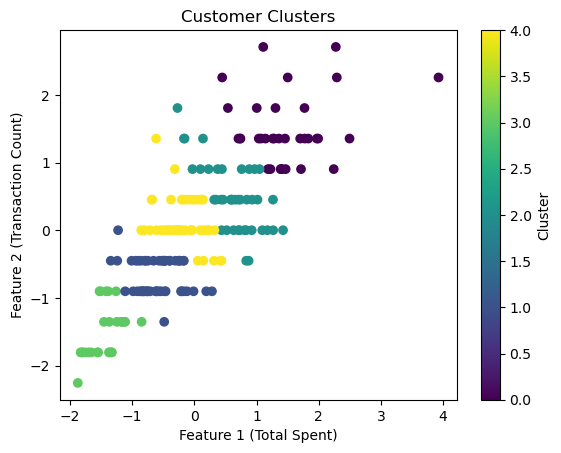

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_profile['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Total Spent)')
plt.ylabel('Feature 2 (Transaction Count)')
plt.colorbar(label='Cluster')
plt.show()
